In [1]:
import numpy as np
import urllib.request
import requests
import urllib
import requests
import pandas as pd 
import os

# LINKS: 
# https://www.ncbi.nlm.nih.gov/pathogens/antimicrobial-resistance/
# https://github.com/ncbi/amr/wiki/AMRFinderPlus-database#availability
# https://gitlab.com/ncbipy/entrezpy

In [2]:
url = "https://ftp.ncbi.nlm.nih.gov/pathogen/Antimicrobial_resistance/AMRFinderPlus/database/latest/ReferenceGeneCatalog.txt"
df = pd.read_csv(urllib.request.urlopen(url), delimiter="\t")
df.head()

,allele,gene_family,whitelisted_taxa,product_name,scope,type,subtype,class,subclass,refseq_protein_accession,...,genbank_start,genbank_stop,refseq_strand,refseq_start,refseq_stop,pubmed_reference,blacklisted_taxa,synonyms,hierarchy_node,db_version
0,NaN,aac(2')-I(A267),NaN,aminoglycoside N-acetyltransferase AAC(2')-I(A...,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/TOBRAMYCIN,WP_025297907.1,...,7204881,7205417,+,101.0,637.0,NaN,NaN,NaN,aac(2')-I(A267),2023-11-15.1
1,NaN,aac(2')-IIa,NaN,kasugamycin N-acetyltransferase AAC(2')-IIa,core,AMR,AMR,AMINOGLYCOSIDE,KASUGAMYCIN,WP_063839881.1,...,12439,13221,+,101.0,883.0,22660700,NaN,NaN,aac(2')-IIa,2023-11-15.1
2,NaN,aac(2')-IIb,NaN,kasugamycin N-acetyltransferase AAC(2')-IIb,core,AMR,AMR,AMINOGLYCOSIDE,KASUGAMYCIN,WP_071224044.1,...,1,723,+,1.0,723.0,27929110,NaN,NaN,aac(2')-IIb,2023-11-15.1
3,NaN,aac(2')-Ia,NaN,aminoglycoside N-acetyltransferase AAC(2')-Ia,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/TOBRAMYCIN,WP_004918308.1,...,264,800,+,101.0,637.0,8407825,NaN,NaN,aac(2')-Ia,2023-11-15.1
4,NaN,aac(2')-Ib,NaN,aminoglycoside N-acetyltransferase AAC(2')-Ib,core,AMR,AMR,AMINOGLYCOSIDE,GENTAMICIN/TOBRAMYCIN,WP_003881640.1,...,265,852,+,101.0,688.0,8891143,NaN,NaN,aac(2')-Ib,2023-11-15.1


In [3]:
df.loc[0]

allele                                                                        NaN
gene_family                                                       aac(2')-I(A267)
whitelisted_taxa                                                              NaN
product_name                    aminoglycoside N-acetyltransferase AAC(2')-I(A...
scope                                                                        core
type                                                                          AMR
subtype                                                                       AMR
class                                                              AMINOGLYCOSIDE
subclass                                                    GENTAMICIN/TOBRAMYCIN
refseq_protein_accession                                           WP_025297907.1
refseq_nucleotide_accession                                           NG_242157.1
curated_refseq_start                                                           No
genbank_protein_

In [4]:
from selenium import webdriver
from webdriver_manager.firefox import GeckoDriverManager
import time 
from bs4 import BeautifulSoup

driver = webdriver.Firefox(executable_path=GeckoDriverManager().install())

In [5]:
def get_ncbi_table(refseq_protein_acc: str) -> str: 
    url = "https://www.ncbi.nlm.nih.gov/protein/" + refseq_protein_acc 
    driver.get(url) 
    time.sleep(20)
    html = driver.page_source
    time.sleep(5)
    soup = BeautifulSoup(html, "lxml")
    return soup.find_all("pre")

table = get_ncbi_table(df.loc[0].refseq_protein_accession)

In [6]:
import re

def convert_table_dict(tab: str) -> dict:
    key, val = "", ""
    d = {}
    for line in str(tab).split("\n"): 
        line = re.sub('<.*?</a>', '', line)
        line = line.strip().split(" ", 1)
        if line[0].isupper():
            d[key] = val
            key = line[0]
            try: 
                val = line[1]
            except IndexError: 
                val = ""
        else: 
            val += "".join(line)
        
    return d

info = convert_table_dict(table)
    

In [7]:
info

{'': '[<preclass="genbank">LOCUS       WP_025297907             178 aa            linear   BCT 19-NOV-2023',
 'DEFINITION': " aminoglycoside N-acetyltransferase AAC(2')-I(A267) [Pseudomonasaeruginosa].",
 'ACCESSION': '  WP_025297907',
 'VERSION': '    WP_025297907.1',
 'KEYWORDS': '   RefSeq.',
 'SOURCE': '     Pseudomonas aeruginosa',
 'ORGANISM': 'Bacteria;Pseudomonadota; Gammaproteobacteria; Pseudomonadales;Pseudomonadaceae;Pseudomonas.',
 'COMMENT': '    REFSEQ: This record represents a single, non-redundant, proteinsequencewhich may be annotated on many different RefSeq genomesfromthe same, or different, species.##Evidence-For-Name-Assignment-START##EvidenceCategory  :: Antimicrobial Resistance ProteinEvidenceAccession ::EvidenceSource    :: Bacterial Antimicrobial Resistance ReferenceGeneDatabase##Evidence-For-Name-Assignment-END##',
 'COMPLETENESS:': 'full length.',
 'FEATURES': '            Location/Qualifiers<spanclass="feature" id="feature_WP_025297907.1_source_0"><script ty

In [8]:
infos = []
for i in range(3): 
    table = get_ncbi_table(df.at[i, "refseq_protein_accession"])
    infos.append(convert_table_dict(table))

In [9]:
infos

[{'': '[<preclass="genbank">LOCUS       WP_025297907             178 aa            linear   BCT 19-NOV-2023',
  'DEFINITION': " aminoglycoside N-acetyltransferase AAC(2')-I(A267) [Pseudomonasaeruginosa].",
  'ACCESSION': '  WP_025297907',
  'VERSION': '    WP_025297907.1',
  'KEYWORDS': '   RefSeq.',
  'SOURCE': '     Pseudomonas aeruginosa',
  'ORGANISM': 'Bacteria;Pseudomonadota; Gammaproteobacteria; Pseudomonadales;Pseudomonadaceae;Pseudomonas.',
  'COMMENT': '    REFSEQ: This record represents a single, non-redundant, proteinsequencewhich may be annotated on many different RefSeq genomesfromthe same, or different, species.##Evidence-For-Name-Assignment-START##EvidenceCategory  :: Antimicrobial Resistance ProteinEvidenceAccession ::EvidenceSource    :: Bacterial Antimicrobial Resistance ReferenceGeneDatabase##Evidence-For-Name-Assignment-END##',
  'COMPLETENESS:': 'full length.',
  'FEATURES': '            Location/Qualifiers<spanclass="feature" id="feature_WP_025297907.1_source_0">

In [10]:
for info in infos: 
    print(info["SOURCE"])
    print(info["ORGANISM"])

     Pseudomonas aeruginosa
Bacteria;Pseudomonadota; Gammaproteobacteria; Pseudomonadales;Pseudomonadaceae;Pseudomonas.
     Pseudomonadota
Bacteria.
     Paenibacillus sp. LC231
Bacteria;Bacillota; Bacilli; Bacillales; Paenibacillaceae;Paenibacillus.


In [11]:
infos[0]["SOURCE"], infos[0]["ORGANISM"]

('     Pseudomonas aeruginosa',
 'Bacteria;Pseudomonadota; Gammaproteobacteria; Pseudomonadales;Pseudomonadaceae;Pseudomonas.')

In [65]:
net_dfs = []
for i, info in enumerate(infos): 
    net_df = pd.DataFrame(columns=["subject", "predicate", "object"])
    ii = info["ORGANISM"].split(";") + [info["SOURCE"]]
    ii = [s.strip() if s[-1] != "." else s[:-1].strip() for s in ii]
    net_df["subject"] = ii[1:]
    net_df["object"] = ii[:-1]
    net_df["predicate"] = "isTaxonOf"
    net_df.loc[len(net_df.index)] = [df.loc[i].product_name, "isTaxonOf", info["SOURCE"].strip()]
    net_dfs.append(net_df)

net_df = pd.concat(net_dfs)

In [66]:
net_df.drop_duplicates(inplace=True)
net_df.reset_index(inplace=True, drop=True)
net_df

,subject,predicate,object
0,Pseudomonadota,isTaxonOf,Bacteria
1,Gammaproteobacteria,isTaxonOf,Pseudomonadota
2,Pseudomonadales,isTaxonOf,Gammaproteobacteria
3,Pseudomonadaceae,isTaxonOf,Pseudomonadales
4,Pseudomonas,isTaxonOf,Pseudomonadaceae
5,Pseudomonas aeruginosa,isTaxonOf,Pseudomonas
6,aminoglycoside N-acetyltransferase AAC(2')-I(A...,isTaxonOf,Pseudomonas aeruginosa
7,kasugamycin N-acetyltransferase AAC(2')-IIa,isTaxonOf,Pseudomonadota
8,Bacillota,isTaxonOf,Bacteria
9,Bacilli,isTaxonOf,Bacillota


In [67]:
net_df.loc[0].to_numpy(), net_df.loc[7].to_numpy()

(array(['Pseudomonadota', 'isTaxonOf', 'Bacteria'], dtype=object),
 array(["kasugamycin N-acetyltransferase AAC(2')-IIa", 'isTaxonOf',
        'Pseudomonadota'], dtype=object))

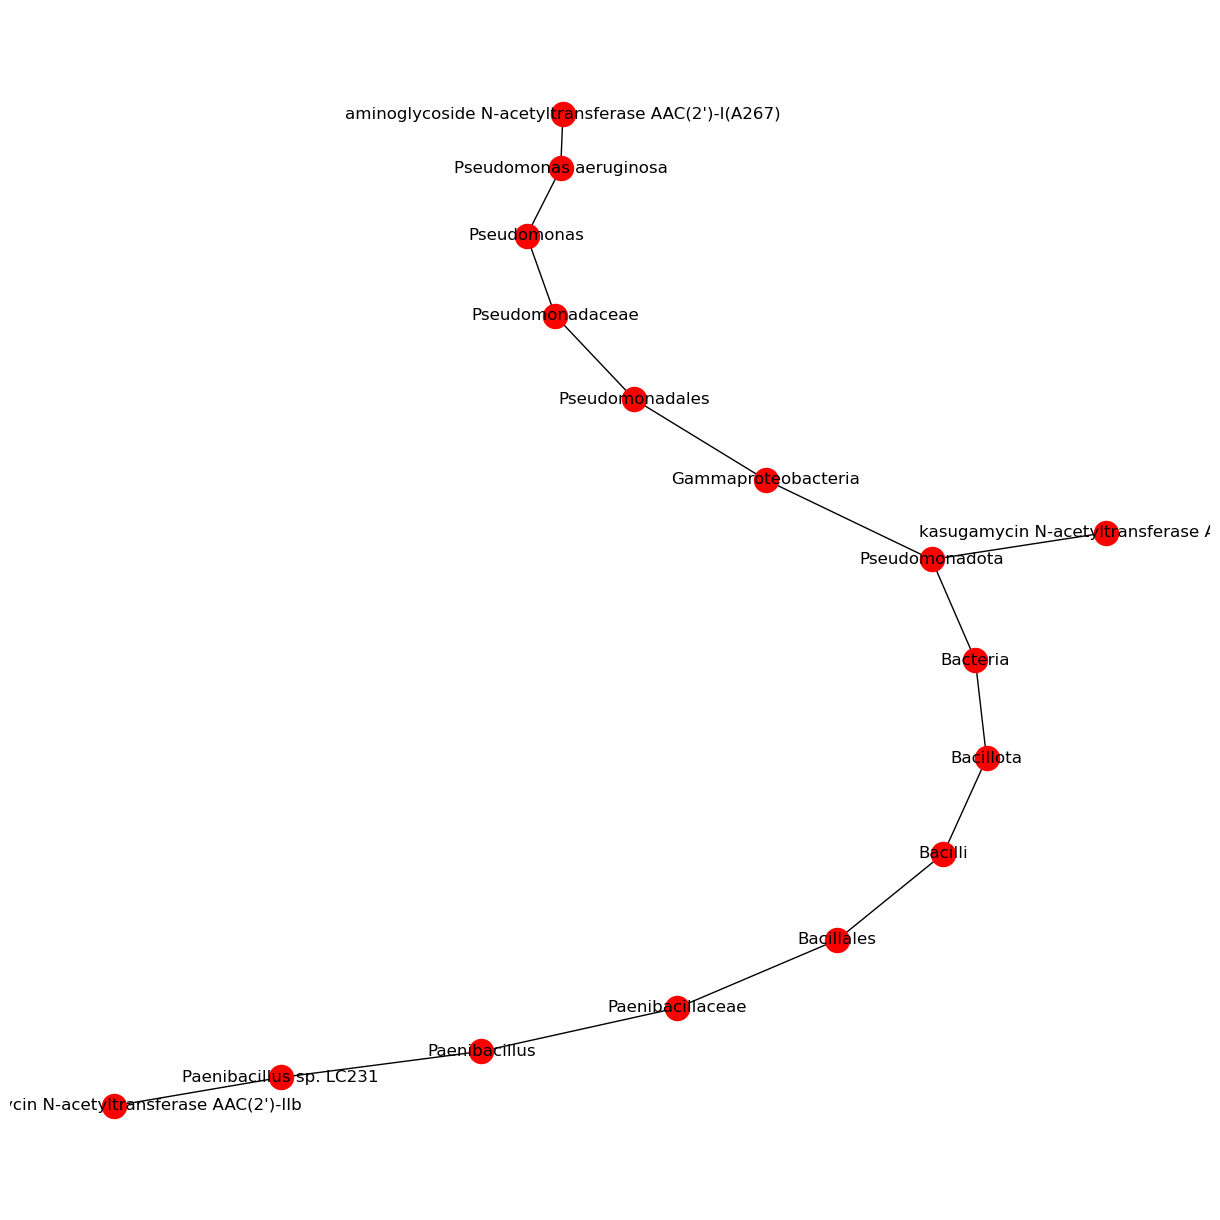

In [68]:
import networkx as nx
import matplotlib.pyplot as plt 

G=nx.from_pandas_edgelist(net_df, "object", "subject", edge_attr=True)

plt.figure(figsize=(12, 12))

pos = nx.spring_layout(G)
nx.draw(G, with_labels=True, node_color="red", edge_cmap=plt.cm.Blues, pos=pos)
plt.show()

In [29]:

import string
 
test_str = 'Gfg, is best: for ! Geeks ;'
 
test_str = test_str.translate(str.maketrans('', '', string.punctuation))
print(test_str)


Gfg is best for  Geeks 
